
1. **Pixel value**
    1. 객체 영역(bbox) 평균 pixel value
    2. 객체 영역을 제외한 배경(background) 평균 pixel value


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import json

In [304]:
data = pd.read_csv('../data(05_19).csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58062 entries, 0 to 58061
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   imagePath  58062 non-null  object 
 1   label      58062 non-null  object 
 2   Shape_num  58062 non-null  int64  
 3   point1_x   58062 non-null  float64
 4   point1_y   58062 non-null  float64
 5   point2_x   58062 non-null  float64
 6   point2_y   58062 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.1+ MB


In [4]:
data.values[0]

array(['3403540', 'pack', 1, 926.446624, 1682.1, 1247.866464, 2283.751008],
      dtype=object)

In [272]:
path = "F:/reusable-trash-images/selectstar-reusable-trash-image/"
image_path = path + data.values[0][0] + ".jpg"
print(image_path,data.values[0][0])
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


F:/reusable-trash-images/selectstar-reusable-trash-image/3403540.jpg 3403540


In [273]:
image.shape

(4032, 2272, 3)

### bbox-pixel-mean

926 1682 1247 2283
(601, 321, 3)


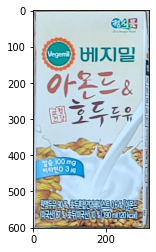

In [33]:
x = int(data.values[0][3])
y = int(data.values[0][4])
w = int(data.values[0][5])
h = int(data.values[0][6])
temp = image[y:h,x:w]
print(x,y,w,h)
print(temp.shape)
plt.imshow(temp)
plt.show()

In [15]:
temp = temp.reshape(temp.shape[0]*temp.shape[1],3)
temp.shape

(192921, 3)

In [23]:
np.average(temp,axis=0).round().astype(np.int32)

array([173, 191, 198])

In [153]:
image.shape

(4032, 2272, 3)

In [245]:
image[0][0]

array([172, 169, 164], dtype=uint8)

In [285]:
image[y:h,x:w]=-1

np.average(image[image[:,:,:]!=255].reshape(-1,3),axis=0).round().astype(np.int32)

array([169, 164, 158])

In [124]:
print((w-x)*(h-y))

192921


In [349]:
bBoxMeanR = []
bBoxMeanG = []
bBoxMeanB = []
eBoxMeanR = []
eBoxMeanG = []
eBoxMeanB = []
for i in range(4000,5001):
    path = "F:/reusable-trash-images/selectstar-reusable-trash-image/"
    image_path = path + data.values[i][0] + ".jpg"
    print(f"{i}번째")
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    x = int(data.values[0][3])
    y = int(data.values[0][4])
    w = int(data.values[0][5])
    h = int(data.values[0][6])
    roi = image[y:h,x:w]
    roi = roi.reshape(roi.shape[0]*roi.shape[1],3)
    temp = np.average(roi,axis=0).round().astype(np.int32)
    image[y:h,x:w]=256
    e_temp = np.average(image[image[:,:,:]!=256].reshape(-1,3),axis=0).round().astype(np.int32)
    bBoxMeanR.append(temp[0])
    bBoxMeanG.append(temp[1])
    bBoxMeanB.append(temp[2])
    eBoxMeanR.append(e_temp[0])
    eBoxMeanG.append(e_temp[1])
    eBoxMeanB.append(e_temp[2])

4000번째
4001번째
4002번째
4003번째
4004번째
4005번째
4006번째
4007번째
4008번째
4009번째
4010번째
4011번째
4012번째
4013번째
4014번째
4015번째
4016번째
4017번째
4018번째
4019번째
4020번째
4021번째
4022번째
4023번째
4024번째
4025번째
4026번째
4027번째
4028번째
4029번째
4030번째
4031번째
4032번째
4033번째
4034번째
4035번째
4036번째
4037번째
4038번째
4039번째
4040번째
4041번째
4042번째
4043번째
4044번째
4045번째
4046번째
4047번째
4048번째
4049번째
4050번째
4051번째
4052번째
4053번째
4054번째
4055번째
4056번째
4057번째
4058번째
4059번째
4060번째
4061번째
4062번째
4063번째
4064번째
4065번째
4066번째
4067번째
4068번째
4069번째
4070번째
4071번째
4072번째
4073번째
4074번째
4075번째
4076번째
4077번째
4078번째
4079번째
4080번째
4081번째
4082번째
4083번째
4084번째
4085번째
4086번째
4087번째
4088번째
4089번째
4090번째
4091번째
4092번째
4093번째
4094번째
4095번째
4096번째
4097번째
4098번째
4099번째
4100번째
4101번째
4102번째
4103번째
4104번째
4105번째
4106번째
4107번째
4108번째
4109번째
4110번째
4111번째
4112번째
4113번째
4114번째
4115번째
4116번째
4117번째
4118번째
4119번째
4120번째
4121번째
4122번째
4123번째
4124번째
4125번째
4126번째
4127번째
4128번째
4129번째
4130번째
4131번째
4132번째
4133번째
4134번째
4135번째
4136번째
4137번째
4138번째
4139번째
4140번째
4141번째
4142번째

In [ ]:
print(len(bBoxMeanR))
print(len(bBoxMeanG))
print(len(bBoxMeanB))
print(len(eBoxMeanR))
print(len(eBoxMeanG))
print(len(eBoxMeanB))

1001
1001
1001
1001
1001
1001


In [ ]:
df_temp = pd.DataFrame({
    "bBoxMeanR":bBoxMeanR,
    "bBoxMeanG":bBoxMeanG,
    "bBoxMeanB":bBoxMeanB,
    "eBoxMeanR":eBoxMeanR,
    "eBoxMeanG":eBoxMeanG,    
    "eBoxMeanB":eBoxMeanB,
    })
df_temp.to_csv("./box5.csv", index=False)
